In [48]:
import numpy as np                                                                                                                                                                                             
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from statistics import mean
from matplotlib import style
style.use('fivethirtyeight')

In [49]:
data=pd.read_csv("E:\\stats_assign_2\\census_mp.csv")

In [50]:
data.head(20)          #to print top 20 rows

,M.P.,%literacy,%fuel for cooking,%used bank service,%availability of assets
0,Alirajpur,36.1,88.7,36.1,6.5
1,Anuppur,67.9,80.6,69.7,16.1
2,Ashoknagar,66.4,59.0,30.4,12.0
3,Balaghat,77.1,90.6,38.5,13.6
4,Barwani,49.1,59.4,38.3,7.4
5,Betul,68.9,79.9,62.0,12.4
6,Bhind,75.3,57.3,34.4,14.8
7,Bhopal,80.4,27.0,61.9,26.3
8,Burhanpur,64.4,57.4,42.5,7.8
9,Chhatarpur,63.7,81.7,42.1,17.7


In [51]:
print("no. of districts : "+str(len(data.index)))

no. of districts : 50


## ANALYSIS PART

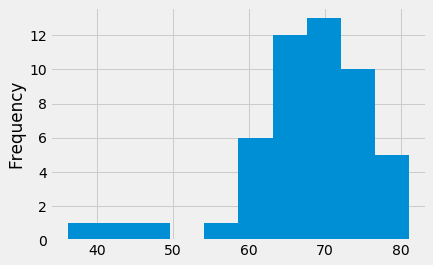

In [52]:
data["%literacy"].plot.hist()

In [56]:
x=np.array(data['%literacy'])
y=np.array(data['%used bank service'])


In [57]:
def best_fit_slop_and_intercept(x,y):
    m=(mean(x)*mean(y)-mean(x*y))/((mean(x))**2-mean(x**2))
    c=mean(y)-m*mean(x)
   
    return m,c



0.31360716561529145 24.98118538816338


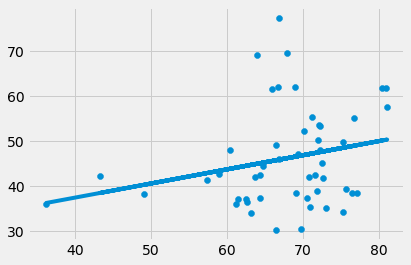

0.27876632112153715 -5.386577211432368


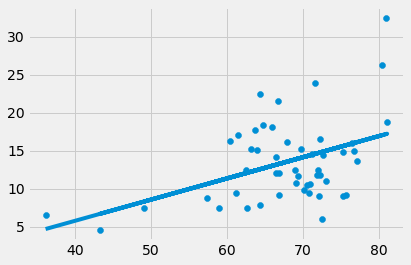

In [62]:
m,c=best_fit_slop_and_intercept(x,y)
print(m,c)
reg_line1=m*x+c
plt.scatter(x,y)
plt.plot(x,reg_line1)
plt.show()

y2=np.array(data['%availability of assets'])
m,c=best_fit_slop_and_intercept(x,y2)
print(m,c)

reg_line2=m*x+c

plt.scatter(x,y2)
plt.plot(x,reg_line2)
plt.show()


## R_square

In [63]:
def sq_error(y_orig,y_line):
    return sum((y_line-y_orig)**2)

def coefficient_of_determination(y_orig,y_line):
    mean_orig=mean(y_orig)
    SE_data=sq_error(mean_orig,y_orig)
    SE_predicted=sq_error(y_line,y_orig)
    return 1-(SE_predicted/SE_data)
    


In [64]:
r_sq=coefficient_of_determination(y,reg_line1)
print(r_sq)

0.060041481500449634


In [65]:
r_sq2=coefficient_of_determination(y2,reg_line2)
print(r_sq2)

0.1924044322674051


## test





slop :  2.0    intercept : 0.0


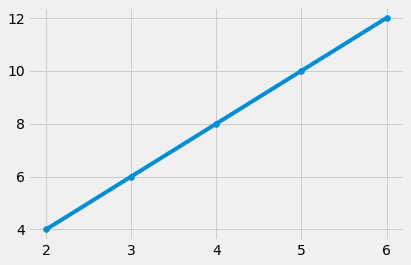

coeff_of_det_is :  1.0


In [86]:
x=np.array([2,3,4,5,6])
y=np.array([4,6,8,10,12])
m,c=best_fit_slop_and_intercept(x,y)
print('slop : ',m , '   intercept :',c)
reg_line1=m*x+c
plt.scatter(x,y)
plt.plot(x,reg_line1)
plt.show()
rsq=coefficient_of_determination(y,reg_line1)
print('coeff_of_det_is : ',rsq)

## random validation

In [101]:
import random
def create_dataset(no,variance,step=2,correlation=False):
    val=1
    ya=[]
    for i in range(no):
        y=val+random.randrange(-variance,variance)
        ya.append(y)
        if correlation and correlation=='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
    x=[i for i in range (len(ya))]
    return x,ya

In [128]:
x,y=create_dataset(40,10,2,correlation='neg')  #see the change in coeff of det by changing variance like2,10,20 etc
x=np.array(x)
y=np.array(y)

slop :  -1.9473684210526316    intercept : 0.0


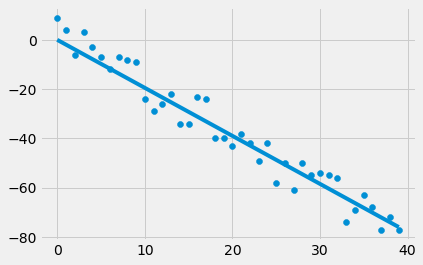

coeff_of_det_is :  0.947718697440419


In [129]:
m,c=best_fit_slop_and_intercept(x,y)
print('slop : ',m , '   intercept :',c)
reg_line1=m*x+c
plt.scatter(x,y)
plt.plot(x,reg_line1)
plt.show()
rsq=coefficient_of_determination(y,reg_line1)
print('coeff_of_det_is : ',rsq)